<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

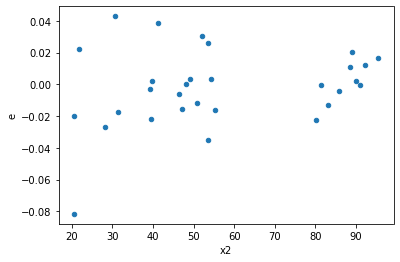

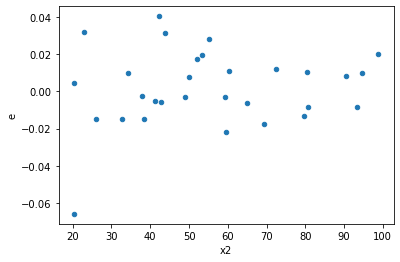

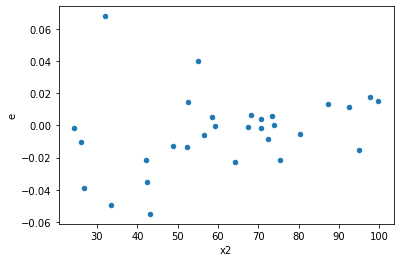

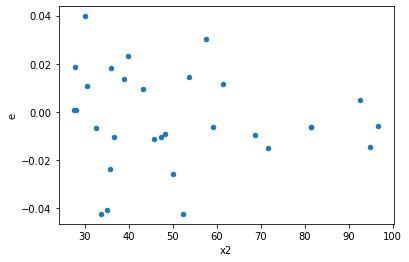

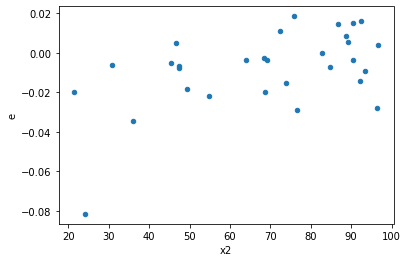

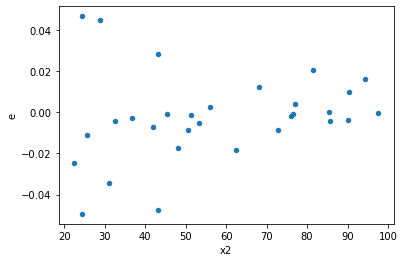

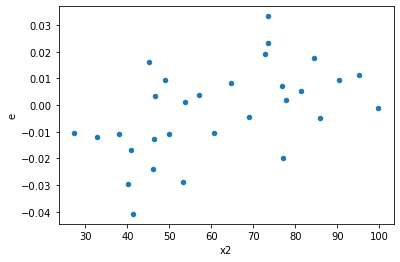

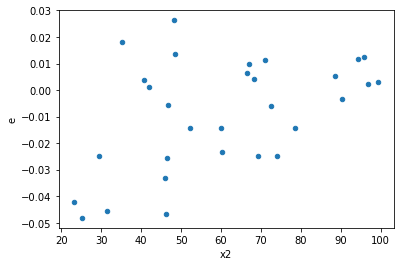

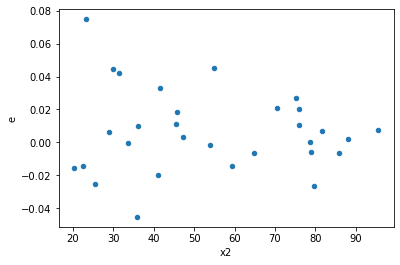

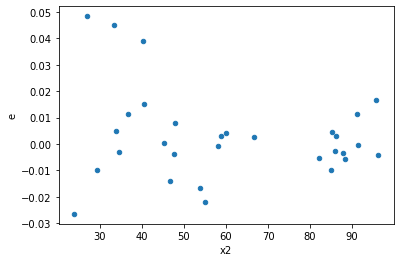

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
19.0,10.0,10.0,0.0006655979303638104,0.0013467795663463591,6.655979303638104e-05,0.0001346779566346359,2.0234130920602778,0.2818215159301567,0.8590892420349217,0.14091075796507835,Reject001=1 : Homoscedasticity
67.0,10.0,10.0,0.0015139681657211444,0.0018373280043082324,0.00015139681657211444,0.00018373280043082325,1.213584305078874,0.7654720299234208,0.6172639850382896,0.3827360149617104,Reject001=1 : Homoscedasticity
95.0,10.0,10.0,0.0013697992201833953,0.002284007377307715,0.00013697992201833952,0.0002284007377307715,1.6674030351703086,0.4328425210907121,0.783578739454644,0.21642126054535604,Reject001=1 : Homoscedasticity
213.0,10.0,10.0,0.0006514529812871701,0.0007759202610316454,6.514529812871701e-05,7.759202610316455e-05,1.1910610332898428,0.787566506709267,0.6062167466453665,0.3937832533546335,Reject001=1 : Homoscedasticity
328.0,10.0,10.0,0.0021654423603541416,0.0022435152783628794,0.00021654423603541416,0.00022435152783628794,1.0360540273147558,0.9564404374589324,0.5217797812705338,0.4782202187294662,Reject001=1 : Homoscedasticity
354.0,10.0,10.0,0.0006333592286030074,0.0012789500130637637,6.333592286030074e-05,0.00012789500130637636,2.0193121933104656,0.28318232926308173,0.8584088353684591,0.14159116463154087,Reject001=1 : Homoscedasticity
487.0,10.0,10.0,0.0008389230890004047,0.0008638651161880238,8.389230890004046e-05,8.638651161880239e-05,1.0297310057556506,0.9639630967087802,0.5180184516456099,0.4819815483543901,Reject001=1 : Homoscedasticity
488.0,10.0,10.0,0.000972371972746299,0.001046107248046687,9.723719727462989e-05,0.0001046107248046687,1.075830317375495,0.9102614345004569,0.5448692827497715,0.45513071725022847,Reject001=1 : Homoscedasticity
656.0,10.0,10.0,0.0021054746081411338,0.002998113583145217,0.00021054746081411338,0.0002998113583145217,1.4239609309713641,0.5866519206859717,0.7066740396570141,0.29332596034298586,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.008519575288729347,0.0012391161199450992,0.0008519575288729348,0.0001239116119945099,0.14544341448385828,0.005330573916361016,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,0.006934935245065791,0.0015826383388187364,0.0006934935245065791,0.00015826383388187364,0.22821241769269354,0.02864430989104218,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,0.014023967116926099,0.001304531917977338,0.00140239671169261,0.0001304531917977338,0.09302160416526113,0.0008391215699313822,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,0.0048124188826047,0.0033472744669457107,0.00048124188826047,0.0003347274466945711,0.69554927544753,0.5765701843940416,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,0.0038262896494054006,0.001686423382055893,0.00038262896494054005,0.0001686423382055893,0.4407463983595598,0.2124396267993279,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,0.011325754916113935,0.0008638736499775428,0.0011325754916113936,8.638736499775428e-05,0.0762751495486142,0.0003533836541542048,Reject001=0 : Heteroscedasticity
6.0,10.0,10.0,0.0022522151119733123,0.001980604033420977,0.00022522151119733121,0.0001980604033420977,0.87940269243893,0.84295057089505,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,0.00615178870220863,0.0011196908468530731,0.000615178870220863,0.00011196908468530731,0.18201061529487822,0.012642948738214947,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,0.011918796082339872,0.0019310441337738182,0.0011918796082339871,0.00019310441337738182,0.16201671044905736,0.008126105481240688,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    514
Reject001=1 : Homoscedasticity      486
Name: Result_test, dtype: int64